In [13]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import cpt

In [2]:
p11, p22, p33 = 0.5, 0.5, 0 #density matrix values
p12, p13, p23 = 0, 0, 0
P0 = np.array([p11, p22, p12, p13, p23], dtype='complex')

In [3]:
w1=cpt.get_w1(1)
w2=cpt.get_w2(1)

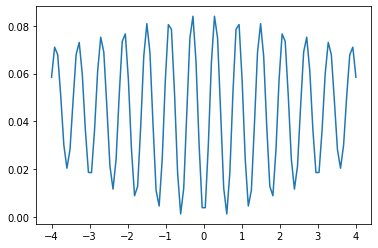

In [11]:
(detuning, p33) = cpt.ramsey_resonance(10, 10, 0.3, P0, 3, 3, 4)
plt.plot(detuning, p33.real)

In [17]:
with open("data1.csv", "a") as datafile:
    writer = csv.writer(datafile)
    for i in range(len(detuning)):
        writer.writerow([detuning[i], p33[i]])